# Assignment 1: Numerical Attributes

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
data = pd.read_csv('telescope_data.csv')

###  1) Compute the multivariate mean vector.

In [23]:
data_without_class = data.drop(columns=['class'])

mean_vector = data_without_class.mean()

mean_vector

fLength      57.675030
fWidth       24.015214
fSize         2.873639
fConc         0.363390
fConc1        0.207434
fAsym        -3.221765
fM3Long      13.136590
fM3Trans      1.791702
fAlpha       31.526518
fDist       197.804527
dtype: float64

### 2) Compute the sample covariance matrix as inner products between the columns of the centered data matrix.

In [26]:
centered_data = data_without_class - data_without_class.mean()

covariance_matrix = (centered_data.T @ centered_data) / (len(centered_data) - 1)

print(covariance_matrix)

              fLength      fWidth      fSize     fConc    fConc1        fAsym  \
fLength   1766.710603  731.278208  13.877761 -4.795976 -2.754310  -338.521963   
fWidth     731.278208  511.310810   7.031488 -2.230835 -1.292486   254.802711   
fSize       13.877761    7.031488   0.226271 -0.067494 -0.038788     0.460739   
fConc       -4.795976   -2.230835  -0.067494  0.029483  0.017875     0.329190   
fConc1      -2.754310   -1.292486  -0.038788  0.017875  0.011461     0.154446   
fAsym     -338.521963  254.802711   0.460739  0.329190  0.154446  3899.838668   
fM3Long   -317.091670 -419.194118   1.608942 -0.884361 -0.605827  -263.597250   
fM3Trans   134.197204   76.420843   0.648693 -0.393915 -0.209961    15.496390   
fAlpha     -42.699515   34.672026  -2.846388  1.319799  0.710753    10.170821   
fDist     1088.506735  456.444068  17.400684 -4.615745 -2.523787  -659.973549   

              fM3Long    fM3Trans      fAlpha        fDist  
fLength   -317.091670  134.197204  -42.699515  

### 3) Compute the sample covariance matrix as outer product between the centered data points.

In [29]:
n_samples = len(centered_data)
n_features = centered_data.shape[1]

covariance_matrix_outer_product = pd.DataFrame(0, index=centered_data.columns, columns=centered_data.columns)

for i in range(n_samples):
    outer_product = pd.DataFrame(np.outer(centered_data.iloc[i], centered_data.iloc[i]), 
                                 index=centered_data.columns, columns=centered_data.columns)
    covariance_matrix_outer_product += outer_product

covariance_matrix_outer_product /= (n_samples - 1)

covariance_matrix_outer_product

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1766.710603,731.278208,13.877761,-4.795976,-2.754310,-338.521963,-317.091670,134.197204,-42.699515,1088.506735
fWidth,731.278208,511.310810,7.031488,-2.230835,-1.292486,254.802711,-419.194118,76.420843,34.672026,456.444068
fSize,13.877761,7.031488,0.226271,-0.067494,-0.038788,0.460739,1.608942,0.648693,-2.846388,17.400684
fConc,-4.795976,-2.230835,-0.067494,0.029483,0.017875,0.329190,-0.884361,-0.393915,1.319799,-4.615745
fConc1,-2.754310,-1.292486,-0.038788,0.017875,0.011461,0.154446,-0.605827,-0.209961,0.710753,-2.523787
fAsym,-338.521963,254.802711,0.460739,0.329190,0.154446,3899.838668,-263.597250,15.496390,10.170821,-659.973549
fM3Long,-317.091670,-419.194118,1.608942,-0.884361,-0.605827,-263.597250,2851.490243,124.168867,-277.106455,633.900249
fM3Trans,134.197204,76.420843,0.648693,-0.393915,-0.209961,15.496390,124.168867,463.939383,-33.519699,165.463602
fAlpha,-42.699515,34.672026,-2.846388,1.319799,0.710753,10.170821,-277.106455,-33.519699,825.699936,-479.369739
fDist,1088.506735,456.444068,17.400684,-4.615745,-2.523787,-659.973549,633.900249,165.463602,-479.369739,6361.467591


### 4) Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Plot the scatter plot between these two attributes.

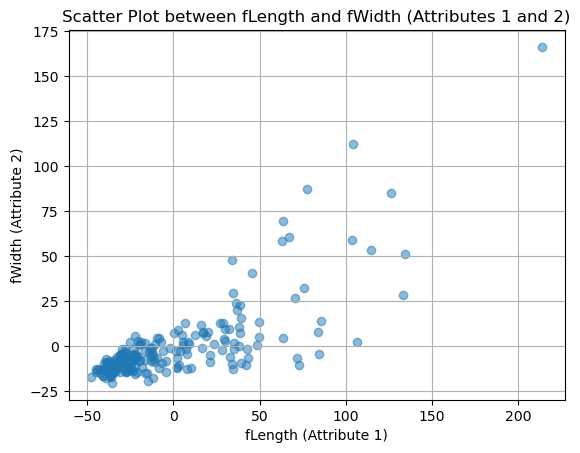

0.7694093096665072

In [32]:
attr1 = centered_data['fLength']
attr2 = centered_data['fWidth']

cosine_similarity = np.dot(attr1, attr2) / (np.linalg.norm(attr1) * np.linalg.norm(attr2))

plt.scatter(attr1, attr2, alpha=0.5)
plt.title('Scatter Plot between fLength and fWidth (Attributes 1 and 2)')
plt.xlabel('fLength (Attribute 1)')
plt.ylabel('fWidth (Attribute 2)')
plt.grid(True)
plt.show()

cosine_similarity

### 5) Assuming that Attribute 1 is normally distributed, plot its probability density function.

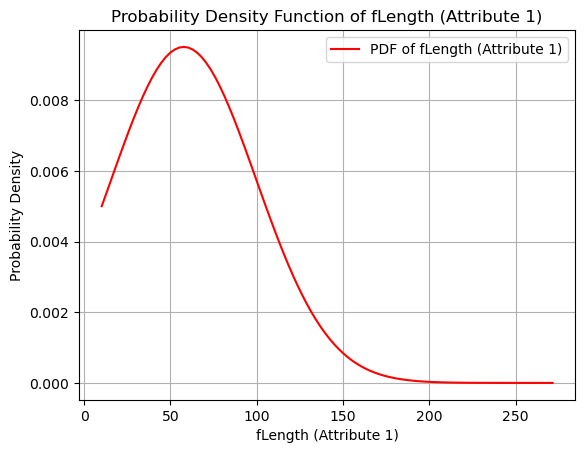

In [40]:
attr1_original = data['fLength']

mean_attr1, std_attr1 = norm.fit(attr1_original)

x = np.linspace(min(attr1_original), max(attr1_original), 100)

pdf_attr1 = norm.pdf(x, mean_attr1, std_attr1)

plt.plot(x, pdf_attr1, 'r-', label='PDF of fLength (Attribute 1)')
plt.title('Probability Density Function of fLength (Attribute 1)')
plt.xlabel('fLength (Attribute 1)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

### 6) Plot pairplot between any two different attributes.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


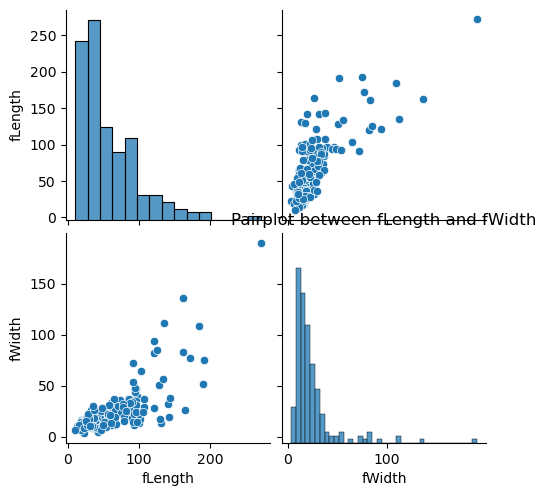

In [43]:
sns.pairplot(data[['fLength', 'fWidth']])
plt.title('Pairplot between fLength and fWidth')
plt.show()

### 7)  Which attribute has the largest variance, and which attribute has the smallest variance? Print these values.

In [47]:
variances = data_without_class.var()

largest_variance_attr = variances.idxmax()
largest_variance_value = variances.max()

smallest_variance_attr = variances.idxmin()
smallest_variance_value = variances.min()

largest_variance_attr, largest_variance_value, smallest_variance_attr, smallest_variance_value

('fDist', 6361.467590825793, 'fConc1', 0.01146129476567164)

### 8) Which pair of attributes has the largest covariance, and which pair of attributes has the smallest covariance? Print these values.

In [50]:
covariance_matrix = data_without_class.cov()

covariance_values = covariance_matrix.where(np.triu(np.ones(covariance_matrix.shape), k=1).astype(bool))

largest_covariance_value = covariance_values.max().max()
largest_covariance_pair = covariance_values.stack().idxmax()

smallest_covariance_value = covariance_values.min().min()
smallest_covariance_pair = covariance_values.stack().idxmin()

largest_covariance_pair, largest_covariance_value, smallest_covariance_pair, smallest_covariance_value

(('fLength', 'fDist'),
 1088.506735404915,
 ('fAsym', 'fDist'),
 -659.9735489916217)

### 9) Plot attribute 6 vs attribute 8. Mark each point as a circle.

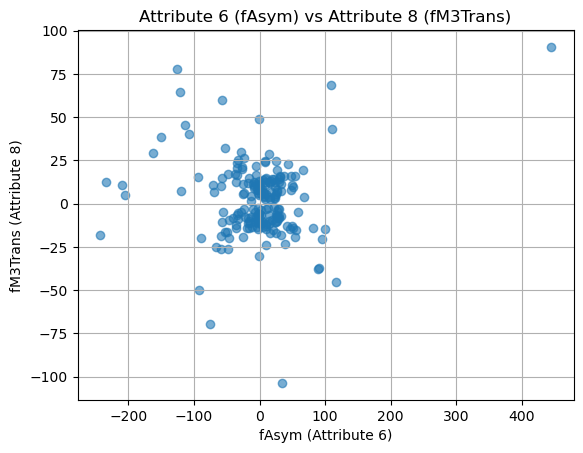

In [53]:
plt.scatter(data['fAsym'], data['fM3Trans'], marker='o', alpha=0.6)
plt.title('Attribute 6 (fAsym) vs Attribute 8 (fM3Trans)')
plt.xlabel('fAsym (Attribute 6)')
plt.ylabel('fM3Trans (Attribute 8)')
plt.grid(True)
plt.show()

##### Matthew Henao Z23685608